Import Important Library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

Important Dataset

In [12]:
df=pd.read_csv("D:\DBMS\HealthApp_2k.log_structured.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [14]:
df.isna().sum()

LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64

**There is Not available Null Value**

In [30]:
df.head(5)

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Hour,minute,second,Steps,Count
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22,15,29,3579.0,1
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22,15,29,NaN,1
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22,15,29,NaN,1
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22,15,29,NaN,1
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22,15,29,NaN,1


In [16]:
df.duplicated().sum()

0

**There is Not available duplicate Value**

In [17]:
df.describe()

,LineId,Pid
count,2000.000000,2000.0
mean,1000.500000,30002312.0
std,577.494589,0.0
min,1.000000,30002312.0
25%,500.750000,30002312.0
50%,1000.500000,30002312.0
75%,1500.250000,30002312.0
max,2000.000000,30002312.0


In [31]:
df.nunique()

LineId           2000
Time             1711
Component          20
Pid                 1
Content          1179
EventId            75
EventTemplate      75
Date                2
Hour                4
minute             60
second             59
Steps             118
Count               1
dtype: int64

In [20]:
df['Time'] = pd.to_datetime(df['Time'], 
                            format='%Y%m%d-%H:%M:%S:%f', errors='coerce')


In [21]:
df['Date'] = df['Time'].dt.date
df['Hour'] = df['Time'].dt.hour
df['minute']=df['Time'].dt.minute
df['second']=df['Time'].dt.second

In [22]:
df

,LineId,Time,Component,Pid,Content,EventId,EventTemplate,Date,Hour,minute,second
0,1,2017-12-23 22:15:29.606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>,2017-12-23,22,15,29
1,2,2017-12-23 22:15:29.615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>,2017-12-23,22,15,29
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,22,15,29
3,4,2017-12-23 22:15:29.635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...,2017-12-23,22,15,29
4,5,2017-12-23 22:15:29.635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data,2017-12-23,22,15,29
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2017-12-24 00:58:53.985,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,0,58,53
1996,1997,2017-12-24 00:59:07.581,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,0,59,7
1997,1998,2017-12-24 01:00:00.794,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,1,0,0
1998,1999,2017-12-24 01:01:00.935,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E44,processHandleBroadcastAction action:android.in...,2017-12-24,1,1,0


In [23]:
df_steps = df[df['EventTemplate'].str.contains('onStandStepChanged')]

In [24]:
step_pattern = 'onStandStepChanged (\d+)'
df['Steps'] = df['Content'].str.extract(step_pattern).astype(float)

The visualization of the daily steps count:

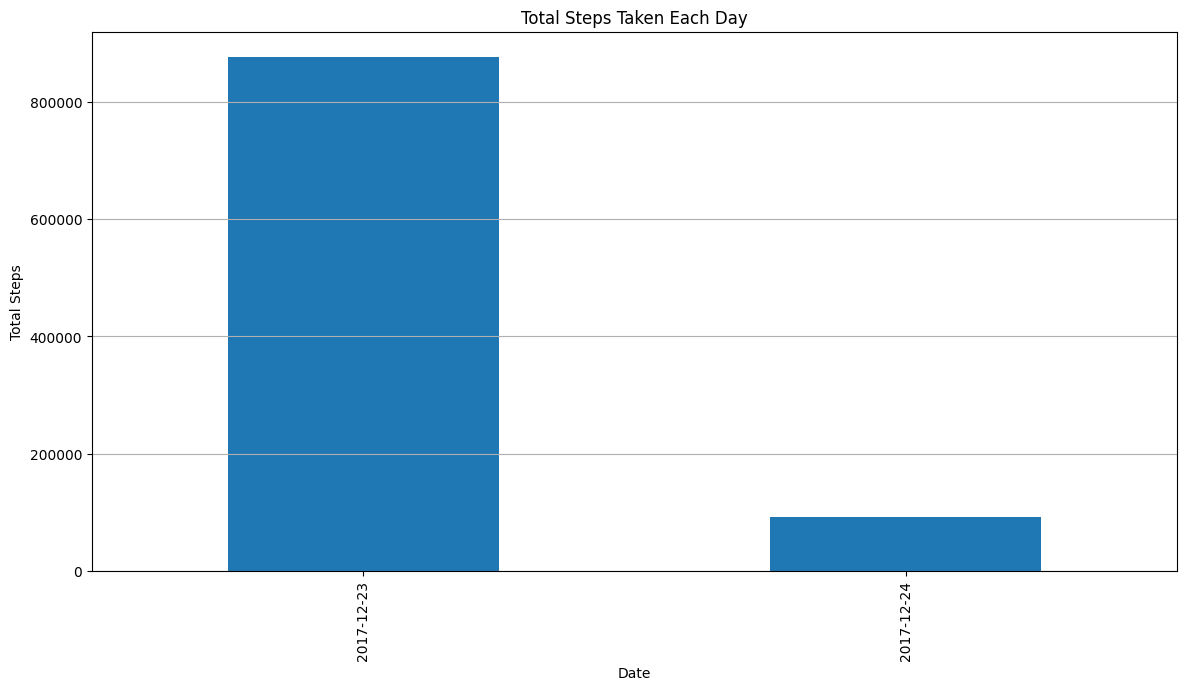

In [25]:
plt.figure(figsize=(14, 7))
df.groupby('Date')['Steps'].sum().plot(kind='bar')
plt.title('Total Steps Taken Each Day')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

I will analyze the active times based on the logs. 
Here's a preview of the log entries by hour for the first few hours available in the dataset:

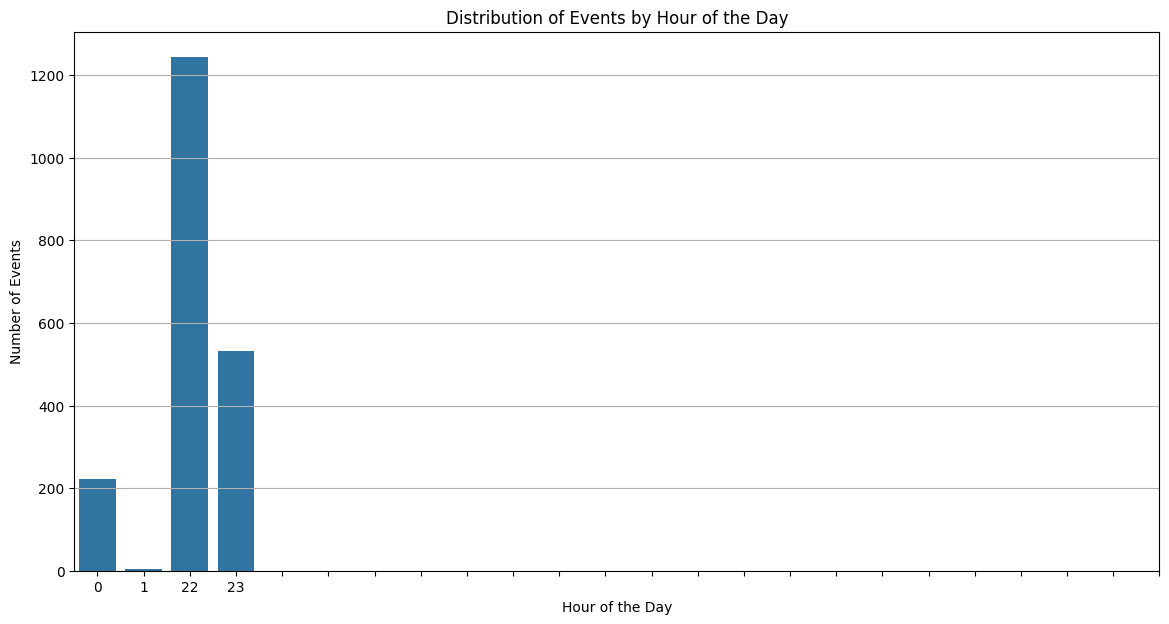

In [26]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Hour', data=df)
plt.title('Distribution of Events by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Events')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

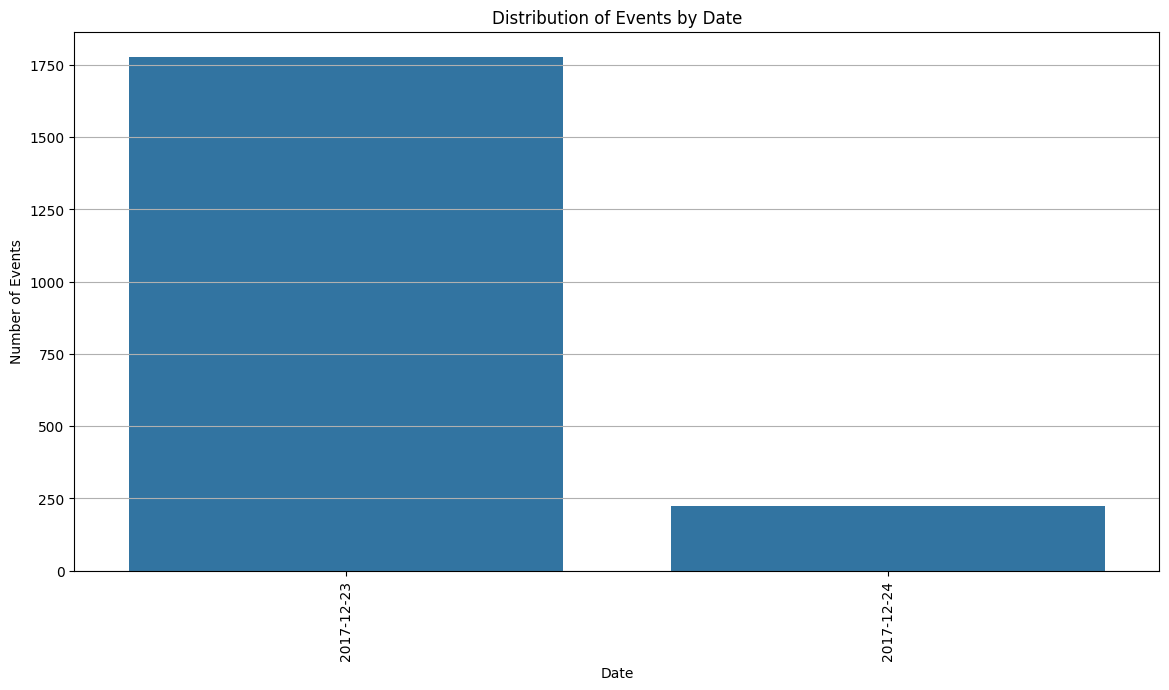

In [27]:

# Plot the distribution of events over different days to identify workout patterns
plt.figure(figsize=(14, 7))
sns.countplot(x='Date', data=df)
plt.title('Distribution of Events by Date')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


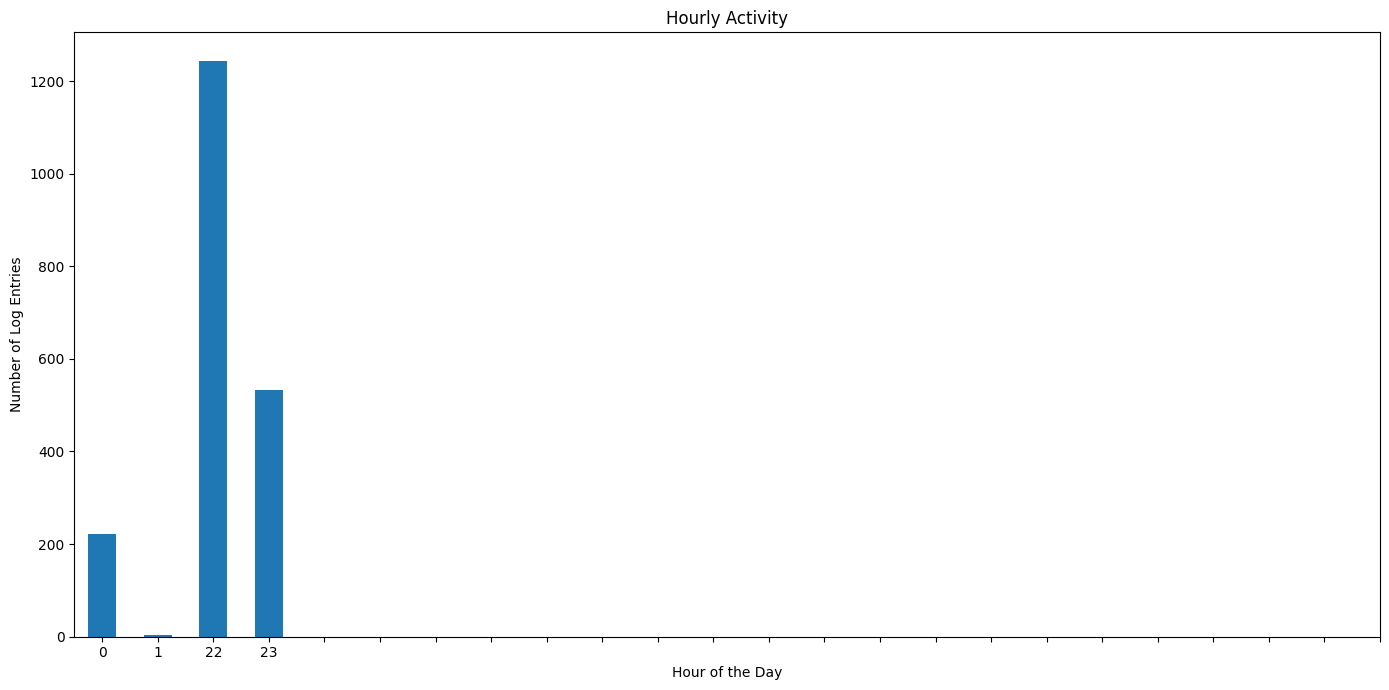

{'hourly_activity_head': Hour
 0      221
 1        3
 22    1243
 23     533
 Name: Count, dtype: int64}

In [28]:
df['Count'] = 1
hourly_activity = df.groupby('Hour')['Count'].sum()

# Plot the hourly activity
hourly_activity.plot(kind='bar', figsize=(14, 7))
plt.title('Hourly Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Log Entries')
plt.xticks(range(0, 24), rotation=0)
plt.tight_layout()
plt.show()

# Return the head of the hourly activity for a preview
{'hourly_activity_head': hourly_activity.head()}

This graph indicates the users active times throughout the day based on the number of log entries. 
The next step would be to analyze specific workout times if such events are logged. Shall we proceed with this analysis?